In [ ]:
############################################################################

# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# pyBibX - A Bibliometric and Scientometric Library
# Example - PubMed

# Citation:
# PEREIRA, V. (2022). Project: pyBibX, File: pbibx.py, GitHub repository: <https://github.com/Valdecy/pyBibX>

############################################################################

In [ ]:
!pip install pyBibX

In [ ]:
# Dowload .bib file
!wget https://github.com/Valdecy/pyBibX/raw/main/assets/bibs/pubmed.txt

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

from pyBibX.base import pbx_probe
from google.colab import data_table
from prettytable import PrettyTable

In [ ]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'pubmed.txt'
database  = 'pubmed'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 334 Documents were Found ( 335 Documents and 1 Duplicates )

Article = 291
Book = 1
Review = 42


In [ ]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

,Main Information,Results
0,Timespan,1990-2023
1,Total Number of Countries,84
2,Total Number of Institutions,1629
3,Total Number of Sources,145
4,Total Number of References,0
5,Total Number of Languages,4
6,--eng; por (# of docs),1
7,--eng; spa (# of docs),1
8,--english (# of docs),331
9,--portuguese (# of docs),1


In [ ]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 15)

,ID,Document
0,0,Dai Z and Xu S and Wu X and Hu R and Li H and ...
1,1,Miloslavsky EM and Naden RP and Bijlsma JW and...
2,2,Khan I and Pintelon L and Martin H (2022). The...
3,3,Nutt DJ and King LA and Phillips LD (2010). Dr...
4,4,Adunlin G and Diaby V and Montero AJ and Xiao ...
...,...,...
329,329,Kurek KA and Heijman W and van Ophem J and Gęd...
330,330,Mohan M and Trump BD and Bates ME and Monica J...
331,331,Papazoglou IA and Kollas JG (1997). Establishi...
332,332,Ocampo-Melgar A and Bautista S and Edward deSt...


In [ ]:
# Check Docs IDs per Type
data_table.DataTable(bibfile.id_doc_types(), num_rows_per_page = 15)

,Document Types,IDs
0,Article,"[1, 3, 10, 14, 17, 18, 19, 22, 25, 26, 27, 28,..."
1,Book,[288]
2,Review,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 2..."


In [ ]:
# Check Authors IDs
data_table.DataTable(bibfile.table_id_aut, num_rows_per_page = 15)

,ID,Author
0,a_0,aarabi b
1,a_1,abaab n
2,a_2,abaza s
3,a_3,abbott c
4,a_4,abbott jh
...,...,...
1765,a_1765,zydlewski j
1766,a_1766,zyla a
1767,a_1767,ágh t
1768,a_1768,álvarez e


In [ ]:
# Check Sources IDs
data_table.DataTable(bibfile.table_id_jou, num_rows_per_page = 15)

,ID,Source
0,j_0,value health
1,j_1,risk anal
2,j_2,integr environ assess manag
3,j_3,med decis making
4,j_4,sci total environ
...,...,...
140,j_140,am j disaster med
141,j_141,altex
142,j_142,adv ther
143,j_143,adicciones


In [ ]:
# Check Institutions IDs
data_table.DataTable(bibfile.table_id_uni, num_rows_per_page = 15)

,ID,Institution
0,i_0,portugal.ibb- institute for bioengineering and...
1,i_1,poland.institute
2,i_2,university of rhode island
3,i_3,department of epidemiology and risk assessment...
4,i_4,norfolk school of public health
...,...,...
1624,i_1624,uk.uk. electronic address: john.wildman@ncl.ac...
1625,i_1625,al. corresponding author: e-mail: ksmiet@piwet...
1626,i_1626,ngaoundere school of veterinary medicine and s...
1627,i_1627,china.shanghai jiao tong university school of ...


In [ ]:
# Check Countries IDs
data_table.DataTable(bibfile.table_id_ctr, num_rows_per_page = 15)

,ID,Country
0,c_0,Japan
1,c_1,Serbia
2,c_2,Iraq
3,c_3,Switzerland
4,c_4,Slovenia
...,...,...
79,c_79,Taiwan
80,c_80,Sweden
81,c_81,Dominica
82,c_82,Niger


In [ ]:
# Check Authors Keywords IDs
data_table.DataTable(bibfile.table_id_kwa, num_rows_per_page = 15)

,ID,KWA
0,k_0,multicriteria decision analysis
1,k_1,mcda
2,k_2,multi-criteria decision analysis
3,k_3,health technology assessment
4,k_4,decision analysis
...,...,...
832,k_832,1
833,k_833,*shared decision-making
834,k_834,*mcda
835,k_835,*gastroenteropancreatic neuroendocrine tumors


In [ ]:
# Check Keywords Plus IDs
data_table.DataTable(bibfile.table_id_kwp, num_rows_per_page = 15)

,ID,KWP
0,p_0,humans
1,p_1,*decision support techniques
2,p_2,decision support techniques
3,p_3,*decision making
4,p_4,cost-benefit analysis
...,...,...
1158,p_1158,*anseriformes
1159,p_1159,*animal distribution
1160,p_1160,*aedes
1161,p_1161,*advisory committees


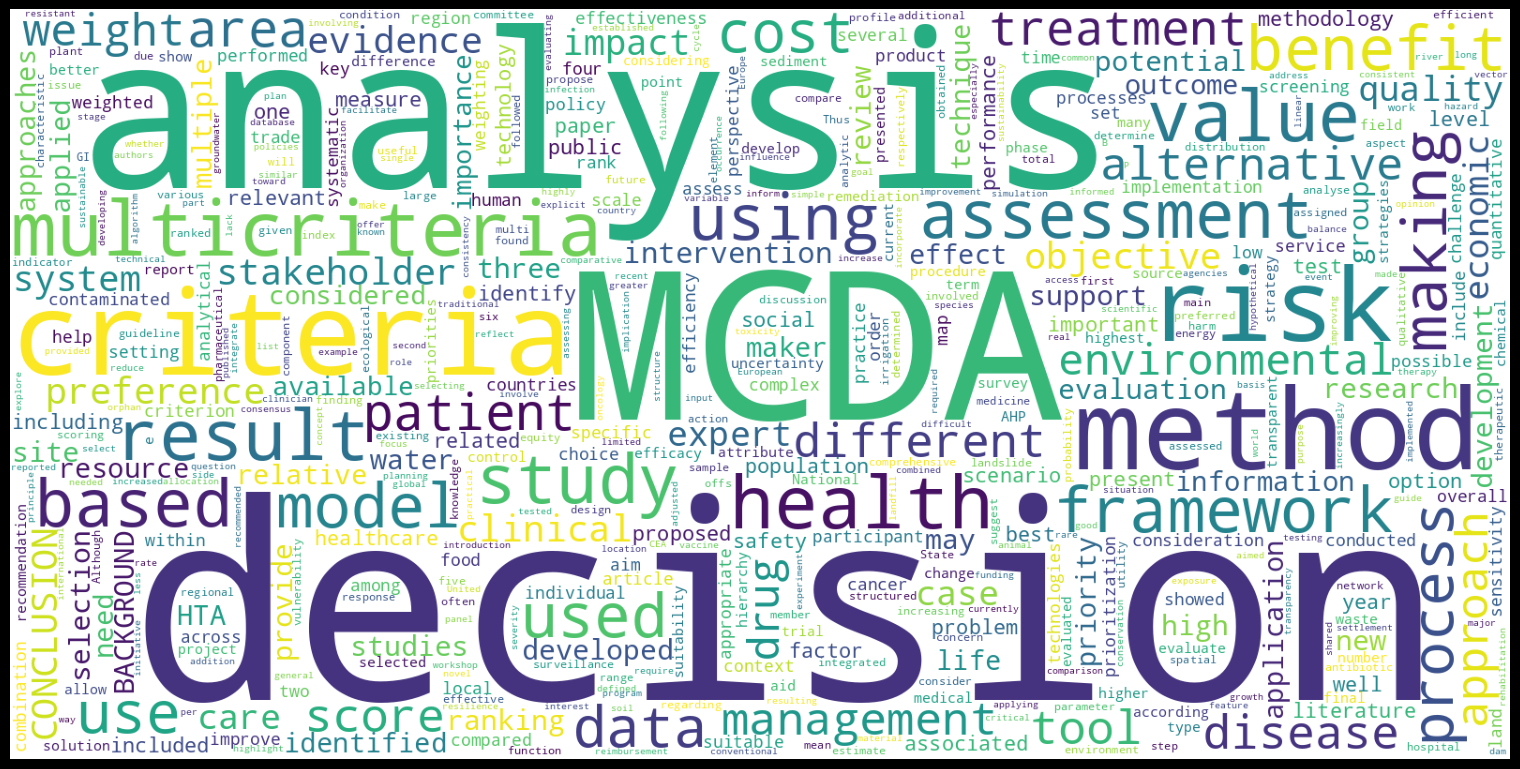

In [ ]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry = 'abs', 'title', 'kwa', or 'kwp'
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

In [ ]:
# Check Table
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+----------------+------------+
|      Word      | Importance |
+----------------+------------+
|    decision    |    1.0     |
|    analysis    |   0.5797   |
|      MCDA      |   0.5305   |
|    criteria    |   0.5187   |
|     method     |   0.4791   |
|      risk      |   0.3861   |
| multicriteria  |   0.3711   |
|     health     |   0.3412   |
|     value      |   0.323    |
|     result     |   0.3187   |
|     study      |   0.293    |
|   assessment   |   0.2781   |
|     based      |   0.2749   |
|     using      |   0.2567   |
|   framework    |   0.2503   |
|    benefit     |   0.2396   |
|     model      |   0.2385   |
|     making     |   0.2364   |
|      used      |   0.231    |
|      use       |   0.2118   |
|    process     |   0.2118   |
|      cost      |   0.2053   |
|      data      |   0.1989   |
|    patient     |   0.1989   |
|      area      |   0.1979   |
|   treatment    |   0.1786   |
|      tool      |   0.1711   |
|     score      |   0.1679   |
|   diff

In [ ]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [ ]:
# Check Table
data_ng = bibfile.ask_gpt_ng
data_table.DataTable(data_ng, num_rows_per_page = 15)

,Word,Freq
0,decision support techniques,163
1,cost benefit analysis,45
2,decision making decision,40
3,making decision support,40
4,technology assessment biomedical,32
5,support techniques humans,32
6,conservation of natural,31
7,of natural resources,31
8,benefit analysis decision,29
9,of health care,26


In [ ]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [ ]:
# Check Table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_table.DataTable(data_pr, num_rows_per_page = 15)

,0,1,2
0,8.823221,5.707712,3.0
1,10.638040,7.269394,1.0
2,8.916813,6.362320,3.0
3,12.101033,7.299304,1.0
4,8.674948,5.758720,3.0
...,...,...,...
329,6.904932,9.133394,0.0
330,8.946904,9.423625,0.0
331,10.086267,5.389223,4.0
332,8.244504,9.316555,0.0


In [ ]:
# Check Articles per Cluster
cluster      = 2
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

14, 17, 33, 38, 97, 99, 102, 111, 115, 117, 118, 128, 130, 133, 134, 161, 173, 178, 182, 184, 187, 188, 191, 194, 196, 198, 207, 214, 217, 221, 230, 236, 245, 259, 265, 271, 275, 276, 278, 291, 294, 299, 303, 306, 307, 308, 312, 314, 319, 324


In [ ]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'kwp',
                            topn             = 10,
                            start            = 2010,
                            end              = 2021)

In [ ]:
# View Table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2010: humans (4), decision support techniques (3), *decision support techniques (3), models (2), water pollutants (2), theoretical (2), quality-
adjusted life years (2), united states (2), united states food and drug administration (1), surface-active agents (1) 2011: humans (5), *decision
support techniques (5), geographic information systems (2), risk assessment/methods (2), intuition (1), ventilator-associated/diagnosis/*therapy (1),
tramadol/therapeutic use (1), soil/chemistry (1), soil pollutants/analysis (1), risk assessment/*methods/statistics & numerical data (1) 2012: humans
(7), *decision support techniques (6), cost-benefit analysis (4), norway (3), logistic models (2), technology assessment (2), consensus (2), research
design/*standards (1), health policy/legislation & jurisprudence (1), health priorities/economics/legislation & jurisprudence/*standards (1) 2013:
humans (4), *decision support techniques (4), risk assessment (4), theoretical (3), animals (3), models (3), *m

In [ ]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

In [ ]:
# View Table
data_sk = bibfile.ask_gpt_sk
data_table.DataTable(data_sk, num_rows_per_page = 15)

,Node From,Node To,Connection Weigth
0,linkov i,United States of America,13
1,wagner m,Canada,9
2,tobiszewski m,Poland,8
3,rindress d,Canada,6
4,goetghebeur mm,Canada,6
5,kaló z,Hungary,5
6,critto a,Italy,5
7,khoury h,Canada,5
8,marcomini a,Italy,5
9,linkov i,UNKNOW_Countries,4


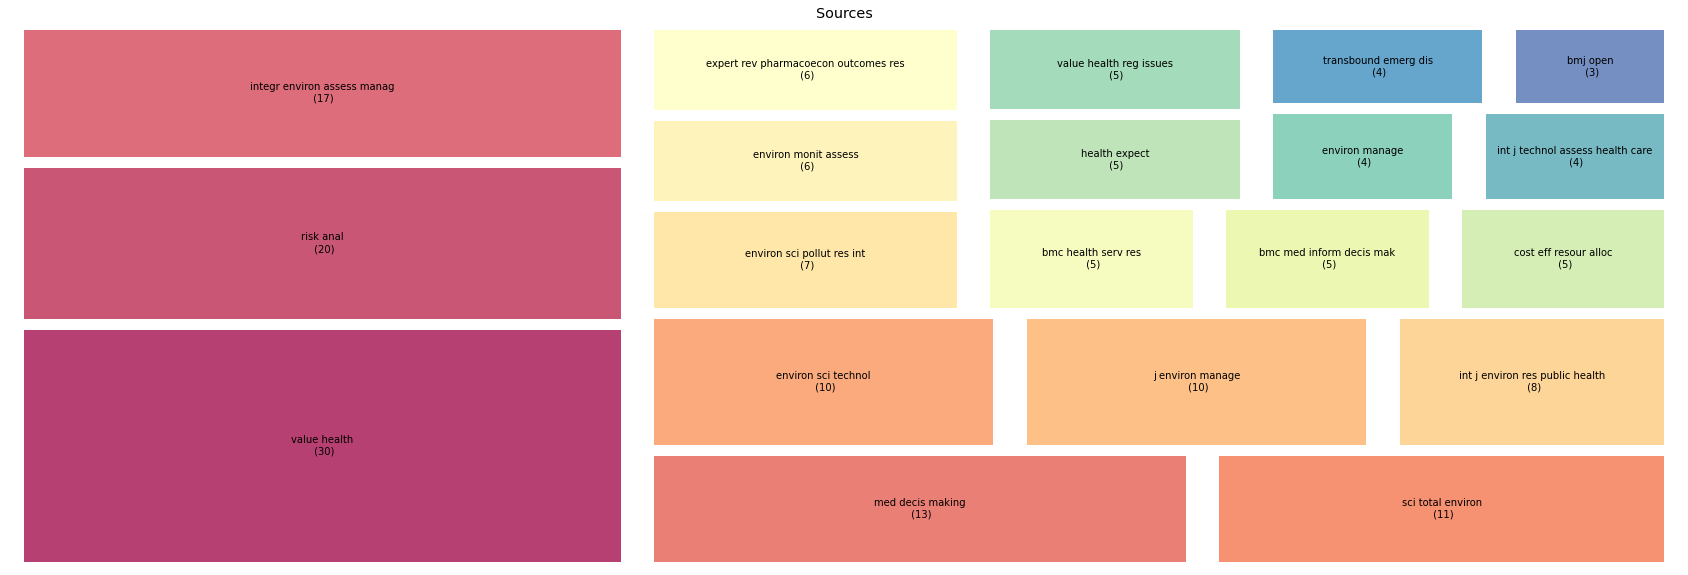

In [ ]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10)

In [ ]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_table.DataTable(data_ap, num_rows_per_page = 15)

,1994,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
linkov i,0.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
wagner m,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
kaló z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
tobiszewski m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0
rindress d,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
goetghebeur mm,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
baltussen r,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
youngkong s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
khoury h,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
thokala p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


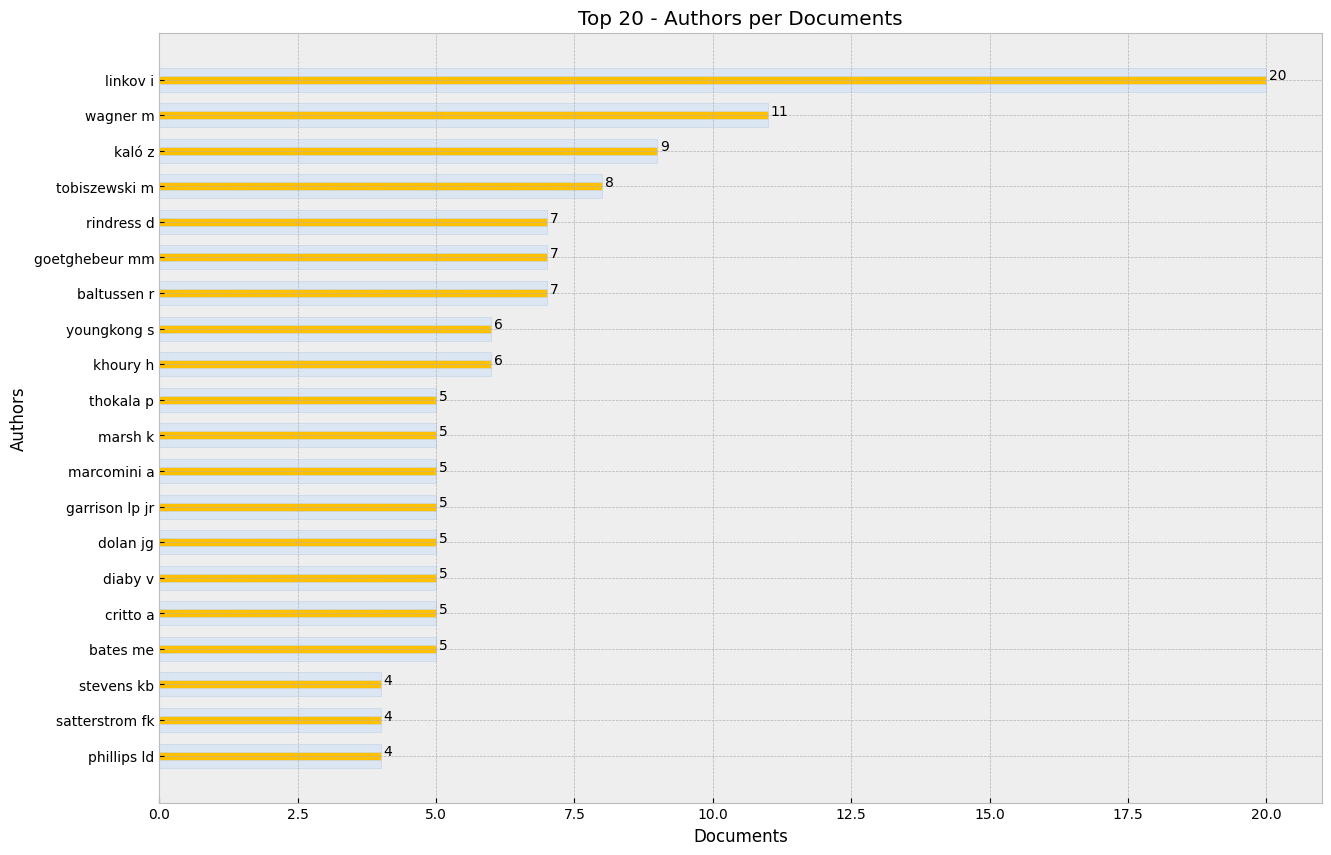

In [ ]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

In [ ]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_table.DataTable(data_bp, num_rows_per_page = 15)

,Documents,Authors
0,linkov i,20
1,wagner m,11
2,kaló z,9
3,tobiszewski m,8
4,rindress d,7
5,goetghebeur mm,7
6,baltussen r,7
7,youngkong s,6
8,khoury h,6
9,thokala p,5


In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
#bibfile.network_adj_dir(view = 'notebook', min_count = 25, node_labels = True, local_nodes = False)

In [ ]:
# View Table
#data_nad = bibfile.ask_gpt_nad
#data_table.DataTable(data_nad, num_rows_per_page = 15)

In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
#bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = [])

In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
#bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = [])

In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
#bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [ ]:
# View Table
#data_hist = bibfile.ask_gpt_hist
#data_table.DataTable(data_hist, num_rows_per_page = 15)

In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
#bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
#bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [ ]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [ ]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_table.DataTable(data_adj, num_rows_per_page = 15)

,Node 1 (Author),Node 2 (Author),Node 1 Cluster,Node 2 Cluster
0,ID: a_514,ID: a_95,2.0,2.0
1,ID: a_2,ID: a_799,6.0,6.0
2,ID: a_8,ID: a_1184,7.0,7.0
3,ID: a_1545,ID: a_95,2.0,2.0
4,ID: a_16,ID: a_95,2.0,2.0
...,...,...,...,...
234,ID: a_928,ID: a_1441,0.0,0.0
235,ID: a_928,ID: a_1442,0.0,0.0
236,ID: a_928,ID: a_1446,0.0,0.0
237,ID: a_949,ID: a_980,0.0,0.0


In [ ]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['youngkong s'], node_only = False)

In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
#bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 10)

In [ ]:
# PubMed does not provide citation data in the .txt file

# Check Similarity Values
#data_table.DataTable(bibfile.sim_table, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [ ]:
# View Table
data_map = bibfile.ask_gpt_map
data_table.DataTable(data_map, num_rows_per_page = 15)

,Country 1,Country 2
0,Serbia,Slovenia
1,Serbia,Netherlands
2,Serbia,Norway
3,Serbia,Greece
4,Serbia,Bosnia and Herzegovina
...,...,...
379,Sweden,Latvia
380,Dominica,Mexico
381,Dominica,Brazil
382,Niger,Canada


In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Brazil'])

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [ ]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                               'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                               'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                               'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                                    Name
0      0    180         0_decision_criteria_mcda_health
1      1    154  1_decision_analysis_risk_environmental


In [ ]:
# NLP
# Each document Topic
topics = bibfile.topics

In [ ]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [ ]:
# NLP
bibfile.topics_representatives()

,Topic,Docs
0,0.0,305; 34; 176
1,1.0,199; 314; 309


In [ ]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  1 Correlation:  0.404
Topic:  0 Correlation:  0.37


In [ ]:
# NLP
bibfile.topic_model.save('my_topic_model')
#loaded_topic_model = BERTopic.load('my_topic_model')

In [ ]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [305, 34, 176], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

<pad>The aim of this study was to develop a practical framework to facilitate decisionmaking in terms of the reimbursement of orphan medicinal
products.</s>


In [ ]:
# NLP - Abstractive Summarization - chatGPT

# OBS 1: Requires the user to have an **API key** (https://platform.openai.com/account/api-keys))
# OBS 2: The limit of characters is 4097 per request

# Arguments: article_ids   = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            join_articles = If False then the abstracts will be analyzed separately. If True then the abstracts will be concate in a single text
#            api_key       = 'your_api_key_here'. Insert your personal API key (https://platform.openai.com/account/api-keys)
#            model         = Specifies the AI model used for text generation. The default value is "text-davinci-003"
#            query         = Ask chatGPT what you want to do with the abstracts. The default query is: 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words'
abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [305, 34, 176], join_articles = True, api_key = 'your_api_key_here', query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

Document ID34 Number of Characters: 2479
Document ID176 Number of Characters: 2161
Document ID305 Number of Characters: 1724

Total Number of Valid Abstracts:  3.0



In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary_chat, 250))

Patient access to orphan medicinal products (OMPs) is limited and varies between countries, reimbursement decisions on OMPs are complex, and there is a need for more transparent processes to know which criteria should be considered to inform these
decisions. This study aimed to determine the most relevant criteria for the reimbursement of OMPs in Spain, from a multi-stakeholder perspective, and using multicriteria decision analysis (MCDA). An MCDA was developed in 3 phases and included 28
stakeholders


In [ ]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [305, 34, 176])


Total Number of Valid Abstracts:  3



Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

BACKGROUND: Patient access to orphan medicinal products (OMPs) is limited and varies between countries, reimbursement decisions on OMPs are complex,
and there is a need for more transparent processes to know which criteria should be considered to inform these decisions. RESULTS: Thirteen criteria
were selected, related to 4 dimensions: patient population, disease, treatment, and economic evaluation. RESULTS: A framework was developed consisting
of seven modules that can evolve over the life cycle of a healthcare intervention. A multicriteria decision analysis (MCDA) Value Matrix (VM) was
developed to include the 15 quantifiable components that are currently considered in decisionmaking. A Quality Matrix was designed to quantify three
criteria of quality for the 12 types of evidence usually required by decisionmakers. It provides a collaborative framework that could connect all
stakeholders and serve the healthcare community at local, national and international levels by allowing sharin

In [ ]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

In [ ]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')